In [9]:
%run preprocecssing_helpers.ipynb
import os
import time
import mne
from mne.preprocessing import ICA
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 15.0)
matplotlib.rcParams.update({'font.size': 15})

In [2]:
path = 'F:\StroopEEG'
eeglab_files = os.listdir(path)
eeglab_dict = search_folders(path, eeglab_files)
eeglab_files = paths_of_eeglab_files(path, eeglab_dict)
eeglab_files

['F:\\StroopEEG\\SA20131216\\20131216_1310.set',
 'F:\\StroopEEG\\SA20131216\\20131216_1441.set',
 'F:\\StroopEEG\\SA20140205\\20140205_1114.set',
 'F:\\StroopEEG\\SA20140205\\20140205_1230.set',
 'F:\\StroopEEG\\SA20140206\\20140206_1029.set',
 'F:\\StroopEEG\\SA20140206\\20140206_1151.set',
 'F:\\StroopEEG\\SA20140207\\20140207_1146.set',
 'F:\\StroopEEG\\SA20140207\\20140207_1219.set',
 'F:\\StroopEEG\\SA20140217\\20140217_1136.set',
 'F:\\StroopEEG\\SA20140217\\20140217_1211.set',
 'F:\\StroopEEG\\SA20140219\\20140219_1046.set',
 'F:\\StroopEEG\\SA20140219\\20140219_1205.set',
 'F:\\StroopEEG\\SA20140220\\20140220_1009.set',
 'F:\\StroopEEG\\SA20140220\\20140220_1123.set',
 'F:\\StroopEEG\\SA20140225\\20140225_1422.set',
 'F:\\StroopEEG\\SA20140225\\20140225_1552.set',
 'F:\\StroopEEG\\SA20140227A\\20140227_1058.set',
 'F:\\StroopEEG\\SA20140227A\\20140227_1220.set',
 'F:\\StroopEEG\\SA20140227B\\20140227_1410.set',
 'F:\\StroopEEG\\SA20140304\\20140304_1418.set',
 'F:\\StroopEEG\\

In [15]:
epoch_destination = 'D:\EpochedEEG'
os.chdir(epoch_destination)

In [4]:
event_id = {'trail_start':  31, 
            'left_button':  131, 
            'right_button': 132,
            'congruent':    133,
            'incongruent':  134,
            'correct':      129,
            'incorrect':    130,
            # targets
            't_baby' :        135,
            't_bell':         136,
            't_bird':         137,
            't_burp':         138,
            't_dog':          139,
            't_drum':         140,
            't_knock':        141,
            't_laugh':        142,
            't_phone':        143,
            't_train':        144,
            't_water':        145,
            #flankers
            'f_baby' :        155,
            'f_bell':         156,
            'f_bird':         157,
            'f_burp':         158,
            'f_dog':          159,
            'f_drum':         160,
            'f_knock':        161,
            'f_laugh':        162,
            'f_phone':        163,
            'f_train':        164,
            'f_water':        165,
}
# event codes 1 - 24 represent flanker and target stim codes. They are NOT explicity defined in dissertation.
for i in range(1,13):
    event_id["flanker_stim_{0}".format(i)] = i
    
for j in range(13, 25):
    event_id["target_stim_{0}".format(j)] = j

In [19]:
for set_file in eeglab_files[0]:
    try:
        start = time.time()
        raw = mne.io.read_raw_eeglab(set_file, preload=True)
        raw.notch_filter(np.arange(60,241,60), filter_length='auto', phase = 'zero')
        raw.filter(5,100, fir_design='firwin')
        raw.resample(256, n_jobs=10)
        ica = ICA(n_components=None, max_iter = 1000, random_state = 42)
        ica.fit(raw,picks = None, decim=3, reject=dict(mag=4e-12, grad=4000e-13))
        ica.detect_artifacts(raw,start_find=None, stop_find=None, ecg_ch=None, 
                     ecg_score_func='pearsonr', skew_criterion=None, 
                     kurt_criterion=None, var_criterion=None,add_nodes=None)
        raw_ica = ica.apply(raw)

        m_event = mne.find_events(raw_ica, min_duration=1/raw.info['sfreq'], shortest_event= 1, initial_event=True)
        epoch = mne.Epochs(raw, events=m_event, event_id = event_id, preload = True)
#         epoch.save(set_file.split('\\')[-1].split('.')[0] + "_epo.fif", verbose = True)
        end = time.time()
        print("SUCESSFULLY LOADED time elapsed: {0}", (end - start))
    except :
        print("***Error converting file: {0}***".format(set_file))
        

Reading F:\StroopEEG\SA20131216\1.fdt
Reading 0 ... 929277  =      0.000 ...  1814.994 secs...
***Error converting file: F:\StroopEEG\SA20131216\20131216_1310.set***
Reading F:\StroopEEG\SA20131216\20131216_1441.fdt
Reading 0 ... 1406417  =      0.000 ...  2746.908 secs...
Setting up band-stop filter
Filter length of 3379 samples (6.600 sec) selected
Setting up band-pass filter from 5 - 1e+02 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 25.0 Hz
Filter length of 845 samples (1.650 sec) selected
5798 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   21.3s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   44.7s finished


5425 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 125.5s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5425 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5424 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5424 events and 180 original time points ...
0 bad

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:    7.3s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   21.7s finished


5379 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128


C:\Users\Esimk_000\Anaconda3\envs\mne\lib\site-packages\sklearn\decomposition\fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


Fitting ICA took 987.2s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5379 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5379 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5379 events and 180 original time points ...
0 bad epochs dropped
SUCESSFULLY LOADED time elapsed: {0} 1071.9007260799408
Reading F:\StroopEEG\SA20140205\20140205_1230.fdt
Reading 0 ... 838231  =      0.000 ...  1637.170 secs...
Setting up band-stop filter
Filter length of 3379 samples (6.600 sec) selected
Setting up band-pass filter from 5 - 1e+02 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 25.0 Hz
Filter length of 845 sam

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   13.0s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   24.7s finished


5565 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 1164.8s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5565 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5565 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5565 events and 180 original time points ...
0 bad epochs

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   19.0s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   33.2s finished


5384 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 825.9s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5384 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5384 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5384 events and 180 original time points ...
0 bad epochs 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   10.7s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   20.4s finished


5584 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 128.2s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5584 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5583 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5583 events and 180 original time points ...
0 bad

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:    7.6s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   19.4s finished


5398 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 169.6s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5398 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5398 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5398 events and 180 original time points ...
0 bad epochs 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:    6.5s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   16.3s finished


5575 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 810.5s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5575 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5575 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5575 events and 180 original time points ...
0 bad epochs 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   16.7s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   35.4s finished


5584 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 90.6s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5584 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5584 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5584 events and 180 original time points ...
0 bad epochs d

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   11.5s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   29.6s finished


5410 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 130.5s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5410 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5410 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5410 events and 180 original time points ...
0 bad epochs 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:    6.9s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   18.0s finished


5433 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 111.8s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5433 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5433 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5433 events and 180 original time points ...
0 bad epochs 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:    6.1s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   15.2s finished


5395 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 64.9s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5395 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5395 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5395 events and 180 original time points ...
0 bad epochs d

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:    5.8s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   13.8s finished


2380 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  15  16  17  19  20  22
  23  24  31 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 155 156 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 337.2s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
2380 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  15  16  17  19  20  22
  23  24  31 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 155 156 158 159 160 161 162 163 164 165]
***Error converting file: F:\StroopEEG\SA20140220\20140220_1009.set***
Reading F:\StroopEEG\SA20140220\20140220_1123.fdt
Reading 0 ... 2315482  =      0.000 ...  4522.426 secs...
Setting up band-stop filter
Filter length of 3379 sampl

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   43.5s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:  1.4min finished


9320 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31  85 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165
 255]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 218.7s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
9320 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31  85 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165
 255]
9317 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 9317 events and 180 original time points

<ipython-input-19-0dd2640f00a1>:4: RuntimeWarning: Events like the following will be dropped entirely: ['__'], 1 in total
  raw = mne.io.read_raw_eeglab(set_file, preload=True)
<ipython-input-19-0dd2640f00a1>:4: RuntimeWarning: 1/5618 event codes could not be mapped to integers. Use the 'event_id' parameter to map such events manually.
  raw = mne.io.read_raw_eeglab(set_file, preload=True)


Setting up band-stop filter
Filter length of 3379 samples (6.600 sec) selected
Setting up band-pass filter from 5 - 1e+02 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 25.0 Hz
Filter length of 845 samples (1.650 sec) selected
5617 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   18.2s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   37.4s finished


5234 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 173.7s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5234 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5234 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5234 events and 180 original time points ...
0 bad epochs 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:    6.2s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   14.9s finished


1054 events found
Event IDs: [  3   4   5   6   7   8  10  11  12  13  14  16  17  18  21  22  23  31
 129 130 131 132 133 134 135 136 137 138 139 141 142 143 145 155 156 157
 158 159 161 163 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 422.8s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
1054 events found
Event IDs: [  3   4   5   6   7   8  10  11  12  13  14  16  17  18  21  22  23  31
 129 130 131 132 133 134 135 136 137 138 139 141 142 143 145 155 156 157
 158 159 161 163 165]
***Error converting file: F:\StroopEEG\SA20140225\20140225_1552.set***
Reading F:\StroopEEG\SA20140227A\20140227_1058.fdt
Reading 0 ... 799299  =      0.000 ...  1561.131 secs...
Setting up band-stop filter
Filter length of 3379 samples (6.600 sec) selected
Setting up band-pass filter from

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   10.1s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   19.6s finished


5423 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 627.4s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5423 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5423 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5423 events and 180 original time points ...
0 bad epochs 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   10.7s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   19.7s finished


5568 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 641.7s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5568 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5568 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5568 events and 180 original time points ...
0 bad epochs 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   43.6s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:  1.5min finished


9327 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 300.1s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
9327 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
9327 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 9327 events and 180 original time points ...
0 bad epochs 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   17.5s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   37.3s finished


7418 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 103.7s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
7418 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
7417 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 7417 events and 180 original time points ...
0 bad

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:    5.6s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   15.3s finished


3380 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  31 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 328.9s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
3380 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  31 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
***Error converting file: F:\StroopEEG\SA20140304\20140304_1614.set***
Reading F:\StroopEEG\SA20140306\20140306_1133.fdt
Reading 0 ... 951345  =      0.000 ...  1858.096 secs...
Setting up band-stop fil

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   10.4s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   20.2s finished


5388 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 84.1s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5388 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5388 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5388 events and 180 original time points ...
0 bad epochs d

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:    6.2s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   14.9s finished


5409 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 105.2s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5409 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5409 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5409 events and 180 original time points ...
0 bad epochs 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:    6.1s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   15.1s finished


5391 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 92.3s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5391 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5391 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5391 events and 180 original time points ...
0 bad epochs d

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:    6.4s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   15.2s finished


5399 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 512.8s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5399 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5399 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5399 events and 180 original time points ...
0 bad epochs 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   10.6s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   19.8s finished


5559 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 71.6s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5559 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5559 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5559 events and 180 original time points ...
0 bad epochs d

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:    6.1s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   15.2s finished


5207 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 78.6s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5207 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5207 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5207 events and 180 original time points ...
0 bad epochs d

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:    6.3s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   15.6s finished


5587 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 744.7s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5587 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5587 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5587 events and 180 original time points ...
0 bad epochs 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   10.9s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   20.2s finished


5282 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 730.1s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5282 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5281 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5281 events and 180 original time points ...
0 bad

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   16.4s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   34.9s finished


6064 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 983.8s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
6064 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
6064 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 6064 events and 180 original time points ...
0 bad epochs 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   10.4s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   19.8s finished


4732 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 764.0s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
4732 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
4732 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 4732 events and 180 original time points ...
0 bad epochs 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   10.8s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   20.7s finished


5909 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 717.9s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5909 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5909 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5909 events and 180 original time points ...
0 bad epochs 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   10.0s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   18.8s finished


4865 events found
Event IDs: [  1   2   3   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20
  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 546.6s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
4865 events found
Event IDs: [  1   2   3   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20
  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
***Error converting file: F:\StroopEEG\SA20140320A\20140320_1156.set***
Reading F:\StroopEEG\SA20140320B\20140320_1421.fdt
Reading 0 ... 929803  =      0.000 ...  1816.021 secs...
Setting up band-stop filter
Fi

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   10.8s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   20.8s finished


5711 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 321.7s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5711 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5711 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5711 events and 180 original time points ...
0 bad epochs 

<ipython-input-19-0dd2640f00a1>:4: RuntimeWarning: Events like the following will be dropped entirely: ['__'], 1 in total
  raw = mne.io.read_raw_eeglab(set_file, preload=True)
<ipython-input-19-0dd2640f00a1>:4: RuntimeWarning: 1/5379 event codes could not be mapped to integers. Use the 'event_id' parameter to map such events manually.
  raw = mne.io.read_raw_eeglab(set_file, preload=True)


Setting up band-stop filter
Filter length of 3379 samples (6.600 sec) selected
Setting up band-pass filter from 5 - 1e+02 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 25.0 Hz
Filter length of 845 samples (1.650 sec) selected
5378 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   10.5s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   19.3s finished


5016 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 391.8s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5016 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5016 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5016 events and 180 original time points ...
1 bad epochs 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   10.4s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   19.3s finished


5391 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 665.3s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5391 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5391 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5391 events and 180 original time points ...
0 bad epochs 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   10.4s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   19.2s finished


5401 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 529.8s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5401 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5401 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5401 events and 180 original time points ...
0 bad epochs 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   16.2s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   35.0s finished


6239 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 914.7s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
6239 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
6239 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 6239 events and 180 original time points ...
0 bad epochs 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:    9.8s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   19.1s finished


4544 events found
Event IDs: [  3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20
  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 412.1s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
4544 events found
Event IDs: [  3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20
  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
***Error converting file: F:\StroopEEG\SA20140325\20140325_1144.set***
Reading F:\StroopEEG\SA20140327\20140327_1022.fdt
Reading 0 ... 1739250  =      0.000 ...  3396.973 secs...
Setting up band-stop filter
Fil

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   17.1s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   39.7s finished


9298 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 1380.3s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
9298 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
9298 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 9298 events and 180 original time points ...
0 bad epochs

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:    5.4s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:    7.4s finished


840 events found
Event IDs: [  1   2   4   5   6   7   8   9  13  14  15  19  20  21  31 129 130 131
 132 133 134 135 136 137 138 139 141 142 143 145 155 157 158 159 161 163
 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 91.7s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
840 events found
Event IDs: [  1   2   4   5   6   7   8   9  13  14  15  19  20  21  31 129 130 131
 132 133 134 135 136 137 138 139 141 142 143 145 155 157 158 159 161 163
 165]
***Error converting file: F:\StroopEEG\SA20140327\20140327_1241.set***
Reading F:\StroopEEG\SA20140331\20140331_1753.fdt
Reading 0 ... 1011554  =      0.000 ...  1975.691 secs...
Setting up band-stop filter
Filter length of 3379 samples (6.600 sec) selected
Setting up band-pass filter from 5 - 1e+02 Hz
l_trans_bandwidth cho

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:    6.4s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   16.1s finished


6579 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 794.8s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
6579 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
6579 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 6579 events and 180 original time points ...
0 bad epochs 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   10.5s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   19.4s finished


5571 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 677.1s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5571 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5571 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5571 events and 180 original time points ...
0 bad epochs 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   10.3s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   18.9s finished


5233 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 532.6s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5233 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5233 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5233 events and 180 original time points ...
0 bad epochs 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   18.9s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   40.1s finished


5057 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 1070.6s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5057 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5057 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5057 events and 180 original time points ...
0 bad epochs

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   10.6s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   19.7s finished


5748 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 739.4s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5748 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5748 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5748 events and 180 original time points ...
0 bad epochs 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   10.9s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   20.0s finished


5753 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 737.2s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5753 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5753 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5753 events and 180 original time points ...
0 bad epochs 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   10.4s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   19.4s finished


5088 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 352.9s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5088 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5088 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5088 events and 180 original time points ...
0 bad epochs 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   10.2s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   18.9s finished


5399 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 627.9s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5399 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5399 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5399 events and 180 original time points ...
0 bad epochs 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   10.0s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   18.8s finished


5403 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 546.1s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5403 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5403 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5403 events and 180 original time points ...
0 bad epochs 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   10.5s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   19.5s finished


5929 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 702.4s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5929 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5929 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5929 events and 180 original time points ...
0 bad epochs 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   10.5s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   18.8s finished


4885 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 408.7s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
4885 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
4885 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 4885 events and 180 original time points ...
0 bad epochs 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   10.0s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   19.0s finished


5228 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 548.6s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5228 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5228 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5228 events and 180 original time points ...
0 bad epochs 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   10.4s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   20.0s finished


5572 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 734.8s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5572 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5572 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5572 events and 180 original time points ...
0 bad epochs 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   15.8s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   33.6s finished


5732 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 833.6s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5732 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5732 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5732 events and 180 original time points ...
0 bad epochs 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   10.5s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   19.6s finished


5081 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 682.4s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5081 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5081 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5081 events and 180 original time points ...
0 bad epochs 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   10.5s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   19.8s finished


5896 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 773.8s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5896 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5896 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5896 events and 180 original time points ...
0 bad epochs 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   10.2s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   19.1s finished


4865 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 534.3s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
4865 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
4865 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 4865 events and 180 original time points ...
0 bad epochs 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   10.6s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   20.2s finished


5754 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 793.9s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5754 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5754 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5754 events and 180 original time points ...
0 bad epochs 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   10.2s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   19.2s finished


5083 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 673.7s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
5083 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
5082 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 5082 events and 180 original time points ...
0 bad

<ipython-input-19-0dd2640f00a1>:4: RuntimeWarning: Events like the following will be dropped entirely: ['__'], 1 in total
  raw = mne.io.read_raw_eeglab(set_file, preload=True)
<ipython-input-19-0dd2640f00a1>:4: RuntimeWarning: 1/3566 event codes could not be mapped to integers. Use the 'event_id' parameter to map such events manually.
  raw = mne.io.read_raw_eeglab(set_file, preload=True)


Setting up band-stop filter
Filter length of 3379 samples (6.600 sec) selected
Setting up band-pass filter from 5 - 1e+02 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 25.0 Hz
Filter length of 845 samples (1.650 sec) selected
3565 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  31 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 155 156 157 158 159 160 162 163 164 165]


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:    9.6s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   17.9s finished


3332 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  31 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 155 156 157 158 159 160 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 300.8s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
3332 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  31 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 155 156 157 158 159 160 162 163 164 165]
***Error converting file: F:\StroopEEG\SA20140430\20140430_1309.set***
Reading F:\StroopEEG\SA20140430\20140430_1501.fdt
Reading 0 ... 1163169  =      0.000 ...  2271.814 secs...
Setting up band-stop filter
Fil

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   16.2s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   34.9s finished


7207 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 930.8s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
7207 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
7207 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 7207 events and 180 original time points ...
0 bad epochs 

In [ ]:
start = time.time()
raw = mne.io.read_raw_eeglab(set_file, preload=True)
raw.notch_filter(np.arange(60,241,60), filter_length='auto', phase = 'zero')
raw.filter(5,100, fir_design='firwin')
raw.resample(256, n_jobs=10)
ica = ICA(n_components=None, max_iter = 1000, random_state = 42)
ica.fit(raw,picks = None, decim=3, reject=dict(mag=4e-12, grad=4000e-13))
ica.detect_artifacts(raw,start_find=None, stop_find=None, ecg_ch=None, 
             ecg_score_func='pearsonr', skew_criterion=None, 
             kurt_criterion=None, var_criterion=None,add_nodes=None)
raw_ica = ica.apply(raw)

m_event = mne.find_events(raw_ica, min_duration=1/raw.info['sfreq'], shortest_event= 0.5, initial_event=True)
epoch = mne.Epochs(raw, events=m_event, event_id = event_id, preload = True)
end = time.time()
print("time elapsed: {0}", (end - start))

## check if saving and loading epoch file works.

In [ ]:
os.chdir(epoch_destination)

In [ ]:

epoch.save('20131216_1310_epo.fif',verbose = True)

In [ ]:
epoch_files = os.listdir(epoch_destination)

In [ ]:
epoch_file = epoch_files[0]
epoch_ = mne.read_epochs(epoch_file,preload=True)

In [ ]:
epoch_.plot(title="epochs");

In [12]:
for set_file in eeglab_files:
    print(set_file.split('\\')[-1].split('.')[0] + "_epo.fif")

20131216_1310
20131216_1441
20140205_1114
20140205_1230
20140206_1029
20140206_1151
20140207_1146
20140207_1219
20140217_1136
20140217_1211
20140219_1046
20140219_1205
20140220_1009
20140220_1123
20140225_1422
20140225_1552
20140227_1058
20140227_1220
20140227_1410
20140304_1418
20140304_1614
20140306_1133
20140306_1338
20140313_1439
20140313_1630
20140314_1424
20140314_1553
20140318_1043
20140318_1211
20140319_1043
20140319_1342
20140320_1040
20140320_1156
20140320_1421
20140320_1543
20140324_1441
20140324_1553
20140325_1007
20140325_1144
20140327_1022
20140327_1241
20140331_1753
20140402_1603
20140402_1734
20140404_1418
20140404_1628
20140410_1217
20140410_1356
20140411_0929
20140411_1105
20140415_1137
20140415_1309
20140418_1421
20140418_1546
20140423_1404
20140423_1554
20140424_1002
20140424_1606
20140428_0959
20140428_1215
20140430_1309
20140430_1501


In [7]:
# start = time.time()
raw = mne.io.read_raw_eeglab(eeglab_files[1], preload=True)
raw.notch_filter(np.arange(60,241,60), filter_length='auto', phase = 'zero')
raw.filter(5,100, fir_design='firwin')
raw.resample(256, n_jobs=10)
ica = ICA(n_components=None, max_iter = 1000, random_state = 42)
ica.fit(raw,picks = None, decim=3, reject=dict(mag=4e-12, grad=4000e-13))
ica.detect_artifacts(raw,start_find=None, stop_find=None, ecg_ch=None, 
             ecg_score_func='pearsonr', skew_criterion=None, 
             kurt_criterion=None, var_criterion=None,add_nodes=None)
raw_ica = ica.apply(raw)

m_event = mne.find_events(raw_ica, min_duration=1/raw.info['sfreq'], shortest_event= 1.5, initial_event=True)
epoch = mne.Epochs(raw, events=m_event, event_id = event_id, preload = True)

KeyboardInterrupt: 

## Read epoched data any plot

In [4]:
path = 'E:\EpochedEEG'
epoch_files = os.listdir(path)

In [7]:
eeg_file = os.path.join(path,epoch_files[0])

In [8]:
epoch = mne.read_epochs(eeg_file, preload = True)

Reading E:\EpochedEEG\20131216_1441_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     500.00 ms
        0 CTF compensation matrices available
5424 matching events found
Applying baseline correction (mode: mean)
5424 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


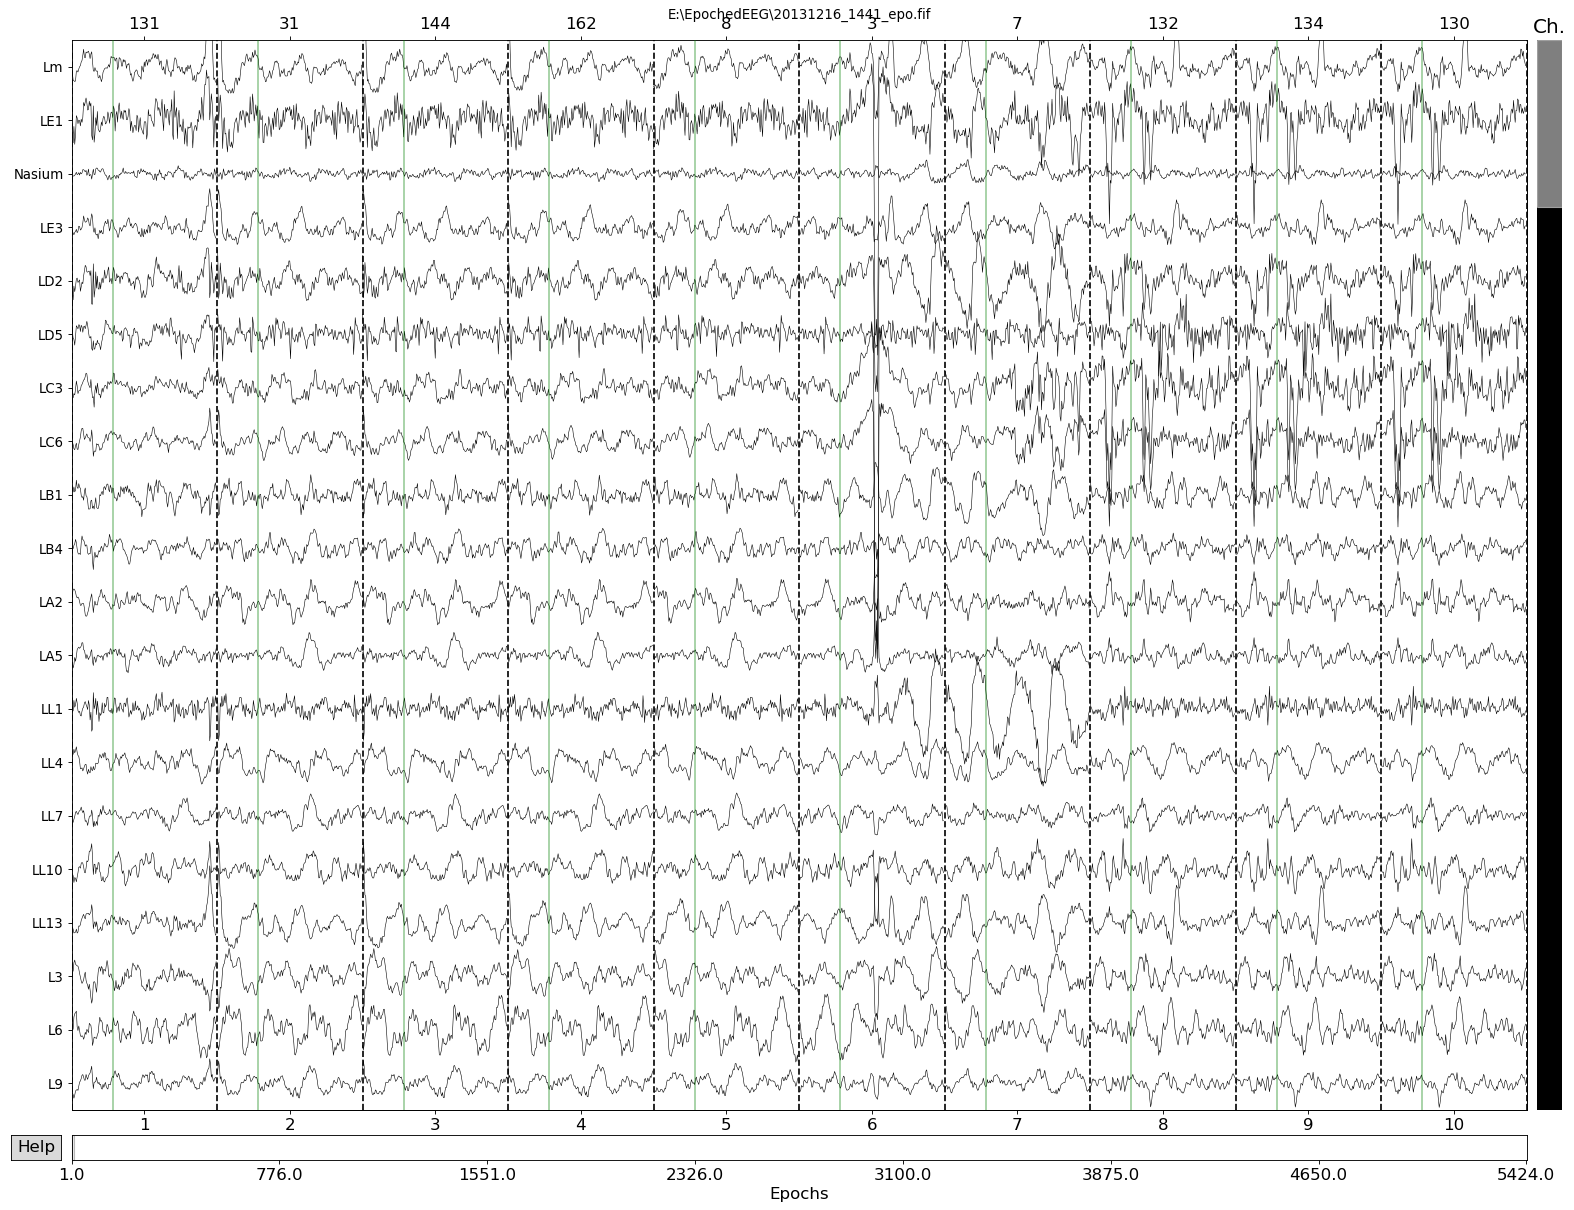

In [12]:
epoch.plot(n_channels=20, n_epochs = 10, title = eeg_file);